In [1]:
#import dependancies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with = engine)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create a session
Session = Session(engine)

In [8]:

# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [9]:
# Find the most recent date in the data set.
recent_date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

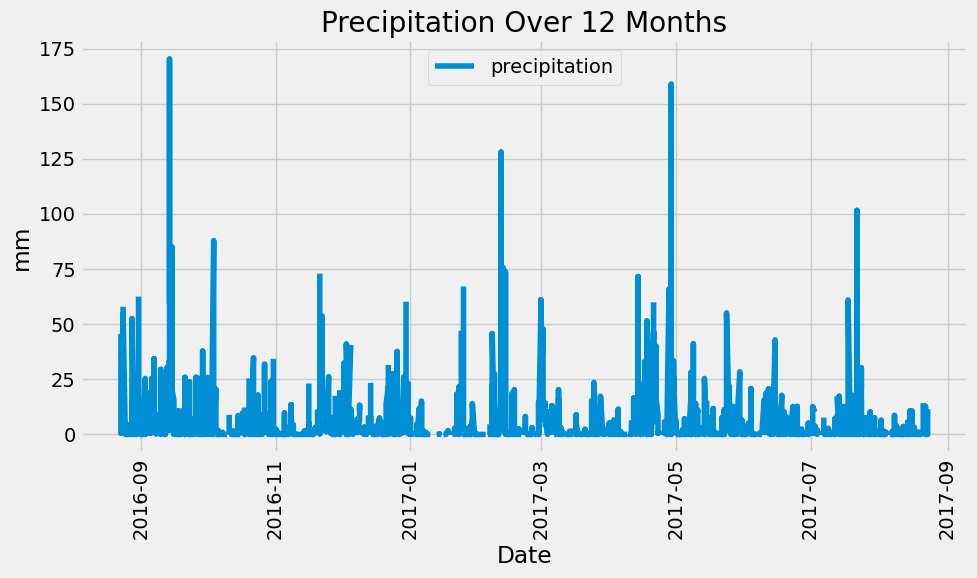

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent_date = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
twelve_months_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_precipitation = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_months_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_prcp = pd.DataFrame(year_precipitation, columns=['date', 'prcp'])

# Sort the dataframe by date
df_prcp['date'] = pd.to_datetime(df_prcp['date'])
df_prcp.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.plot(df_prcp['date'], df_prcp['prcp'])
plt.xlabel('Date')
plt.ylabel('mm')
plt.title('Precipitation Over 12 Months')
plt.xticks(rotation=90)
plt.legend(['precipitation'], loc='upper center')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df_prcp['prcp'].describe()

# Print title and summary statistics
print("Summary Statistics for Precipitation Data:")
print(summary_statistics)

Summary Statistics for Precipitation Data:
count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activte_stations = Session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()



activte_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
summary_statistics_USC00519281 = Session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).\
                     filter(Measurement.station == most_active_station_id).all()

# Print the results
lowest_temp, highest_temp, avg_temp = summary_statistics_USC00519281[0]
print(f"Lowest Temperature: {lowest_temp} °C")
print(f"Highest Temperature: {highest_temp} °C")
print(f"Average Temperature: {avg_temp} °C")

Lowest Temperature: 12.2 °C
Highest Temperature: 29.4 °C
Average Temperature: 22.03582251082252 °C


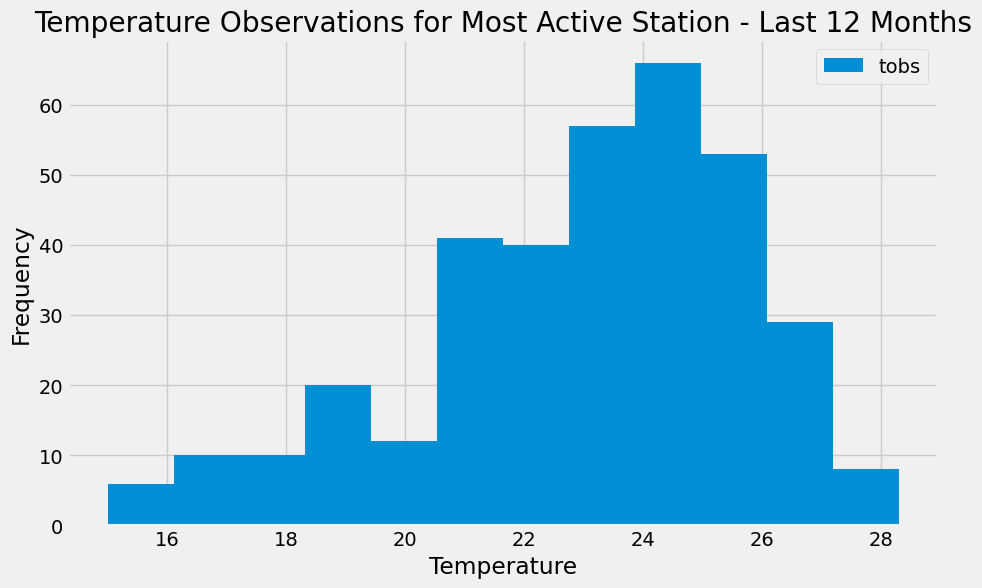

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temps = Session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id,
           Measurement.date >= twelve_months_ago).all()

temperatures = [temp[0] for temp in last_year_temps]

plt.figure(figsize=(10, 6))
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Most Active Station - Last 12 Months')
plt.legend()
plt.show()

# Close Session

In [16]:
# Close Session
Session.close()
